---



---




### ***Machine Learnnig Based Bank Transaction Fraud Detection System***

Author: Nikhitha Saidugari


---

---

# Step 1: Import the Necessary Libraries

In [ ]:
# Import the necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.cluster import KMeans
from sklearn.ensemble import VotingClassifier

# Step 2: Load the Dataset
References:
Kaggle Dataset: https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection

DataSet Name: bank_transactions_data_2.csv

In [ ]:
# Load data from Kaggle

data = pd.read_csv('bank_transactions_data_2.csv')

# Display basic details
print("Columns in the dataset:")
print(data.columns)
print("\nSample rows from the dataset:")
print(data.head())
print(data.info())
print(data.describe())

Columns in the dataset:
Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

Sample rows from the dataset:
  TransactionID AccountID  TransactionAmount TransactionDate TransactionType  \
0      TX000001   AC00128              14.09  11/04/23 16:29           Debit   
1      TX000002   AC00455             376.24  27/06/23 16:44           Debit   
2      TX000003   AC00019             126.29  10/07/23 18:16           Debit   
3      TX000004   AC00070             184.50  05/05/23 16:32           Debit   
4      TX000005   AC00411              13.45  16/10/23 17:51          Credit   

    Location DeviceID      IP Address MerchantID Channel  CustomerAge  \
0  San Diego  D000380  162.198.218.92       M015     ATM          

# Step 3: Data Preprocessing & Define Fraudulent Logic


Count of fraudulent vs non-fraudulent transactions:
is_fraud
0    2448
1      64
Name: count, dtype: int64

Sample of fraudulent transactions:
    TransactionID AccountID  TransactionAmount TransactionDate  \
26       TX000027   AC00441             246.93  17/04/23 16:37   
91       TX000092   AC00310             223.85  02/10/23 16:36   
147      TX000148   AC00161             514.95  13/04/23 18:37   
266      TX000267   AC00178              66.90  17/04/23 16:50   
274      TX000275   AC00454            1176.28  20/12/23 16:08   

    TransactionType     Location DeviceID       IP Address MerchantID Channel  \
26            Debit        Miami  D000046   55.154.161.250       M029     ATM   
91            Debit  Kansas City  D000481  133.223.159.151       M009     ATM   
147           Debit     New York  D000109     23.92.205.75       M056  Online   
266          Credit    Charlotte  D000221   138.210.196.19       M021  Online   
274          Credit  Kansas City  D000476      50.202.

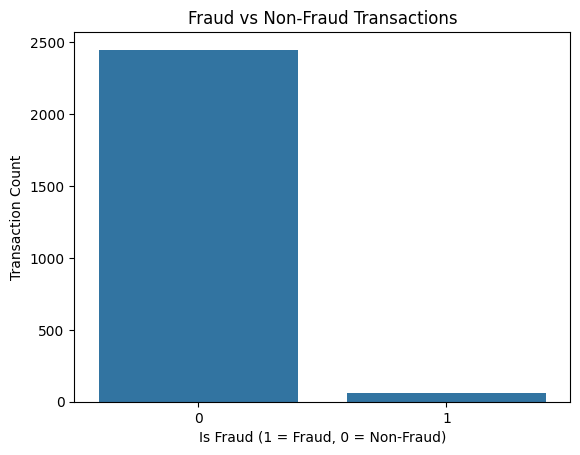

In [ ]:
# Define Fraud Logic
# Example logic: LoginAttempts > 3 or TransactionAmount > 10,000
data['is_fraud'] = data.apply(
    lambda row: 1 if (row['TransactionAmount'] > 10000) or (row['LoginAttempts'] > 3) else 0, axis=1)

# Verify Fraudulent Transactions
print("\nCount of fraudulent vs non-fraudulent transactions:")
print(data['is_fraud'].value_counts())
print("\nSample of fraudulent transactions:")
print(data[data['is_fraud'] == 1].head())

# Visualize Fraudulent Transactions
sns.countplot(x='is_fraud', data=data)
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Is Fraud (1 = Fraud, 0 = Non-Fraud)')
plt.ylabel('Transaction Count')
plt.show()

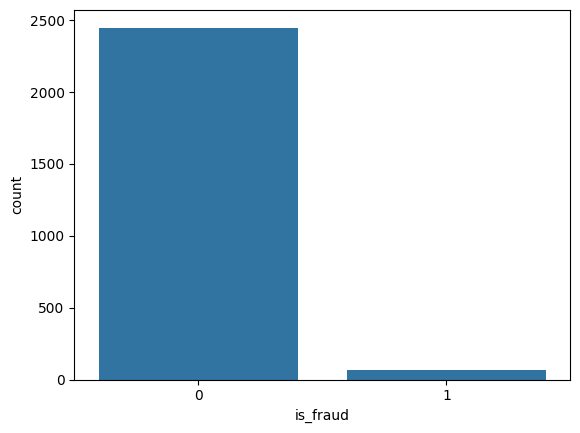

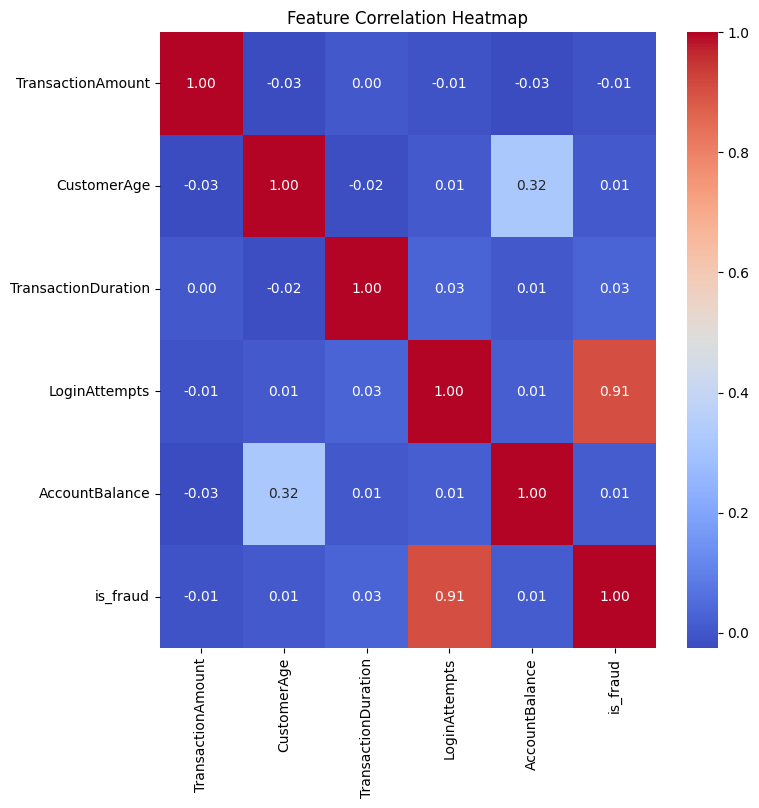

In [ ]:
# Select Only Numeric Columns
sns.countplot(x='is_fraud', data=data)
numeric_data = data.select_dtypes(include=['number'])
corr = numeric_data.corr()

# Plot the Heatmap(Adjust the size as needed)
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

# Step 4: Normalize the Model

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Convert categorical columns using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Split features and labels
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
is_fraud                   0
dtype: int64


# Step 5: Apply Dimensionality Reduction

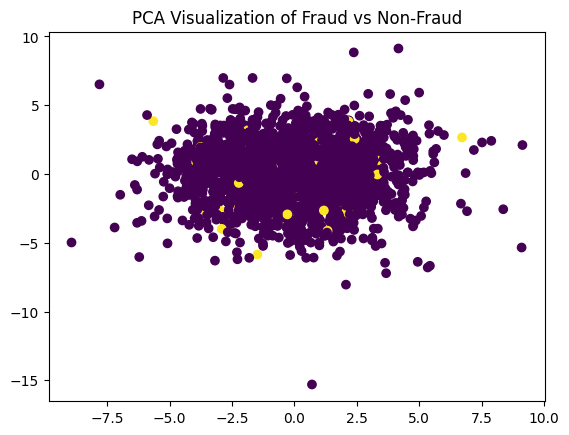

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Visualization of Fraud vs Non-Fraud')
plt.show()

# Step 6: Train the Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# K Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       740
           1       0.00      0.00      0.00        14

    accuracy                           0.98       754
   macro avg       0.49      0.50      0.50       754
weighted avg       0.96      0.98      0.97       754



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Step 7: Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       740
           1       0.00      0.00      0.00        14

    accuracy                           0.98       754
   macro avg       0.49      0.50      0.50       754
weighted avg       0.96      0.98      0.97       754



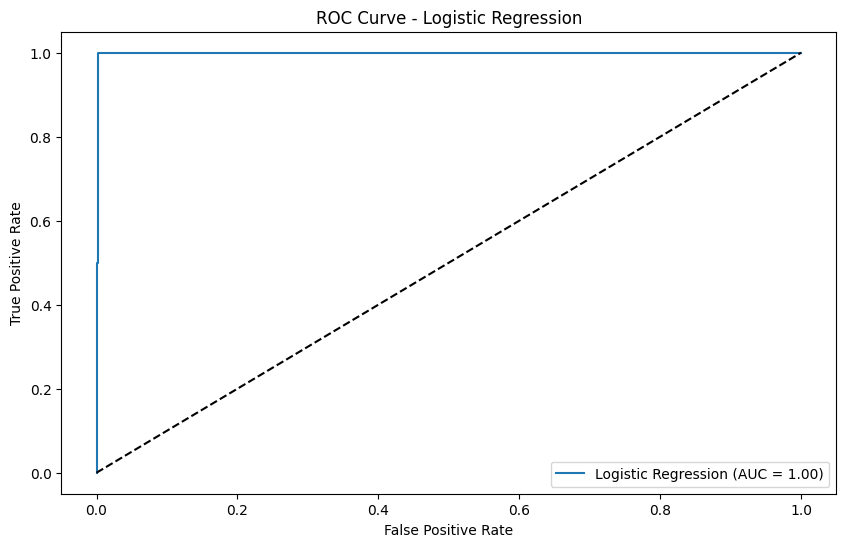

In [ ]:
# Logistic Regression:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(classification_report(y_test, lr_pred))

# Logistic Regression Visualization
from sklearn.metrics import roc_curve, auc

lr_probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Step 8: Decision Trees

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       1.00      1.00      1.00        14

    accuracy                           1.00       754
   macro avg       1.00      1.00      1.00       754
weighted avg       1.00      1.00      1.00       754



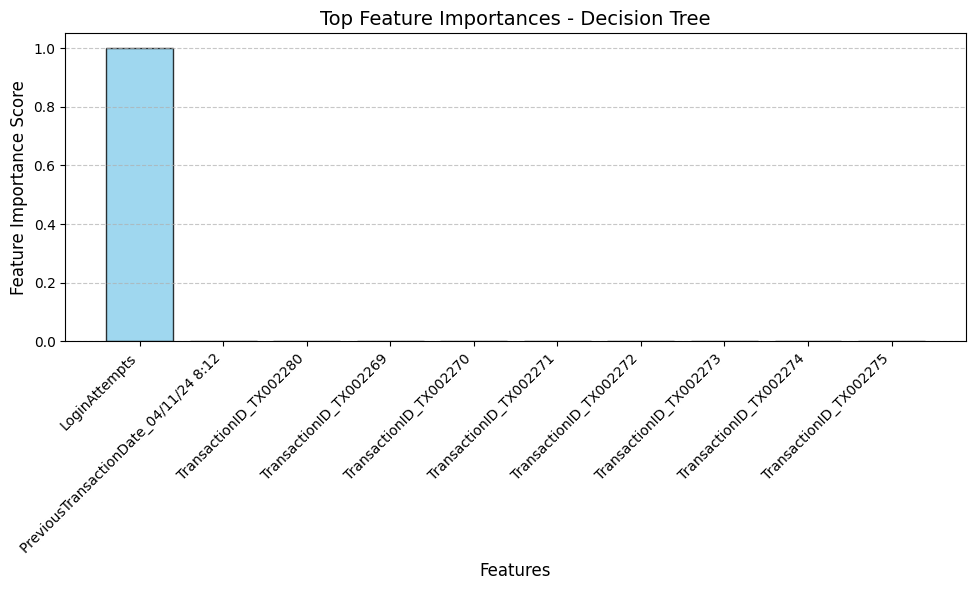

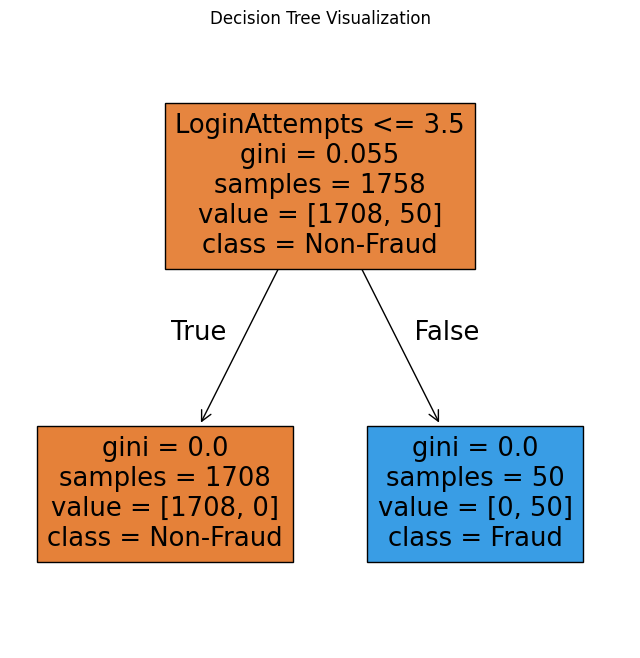

In [ ]:
# Decision Trees:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict using the Decision Tree
dt_pred = dt.predict(X_test)

# Print Classification Report
print(classification_report(y_test, dt_pred))

# Extract feature importances and sort them for clarity
importances = dt.feature_importances_
features = X.columns
sorted_indices = np.argsort(importances)[::-1]  # Sort in descending order

# Filter top N important features (e.g., top 10)
top_n = 10
top_features = sorted_indices[:top_n]

# Create the vertical bar plot for top N features
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features)), importances[top_features],
        color='skyblue', edgecolor='black', alpha=0.8)
plt.xticks(range(len(top_features)), [features[i] for i in top_features], rotation=45, ha='right')
plt.ylabel('Feature Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.title('Top Feature Importances - Decision Tree', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Decision Tree - Tree Graph (Visualization)
plt.figure(figsize=(8, 8))
plot_tree(dt, feature_names=X.columns, class_names=['Non-Fraud', 'Fraud'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

# Step 9: Random Forest & Gradient Boosting

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       740
           1       0.00      0.00      0.00        14

    accuracy                           0.98       754
   macro avg       0.49      0.50      0.50       754
weighted avg       0.96      0.98      0.97       754



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       1.00      1.00      1.00        14

    accuracy                           1.00       754
   macro avg       1.00      1.00      1.00       754
weighted avg       1.00      1.00      1.00       754



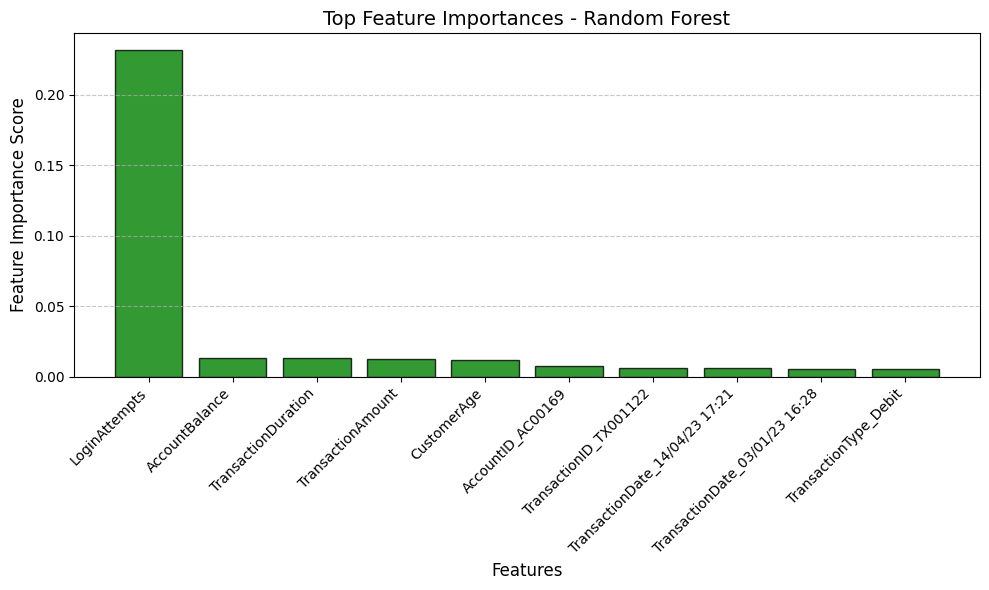

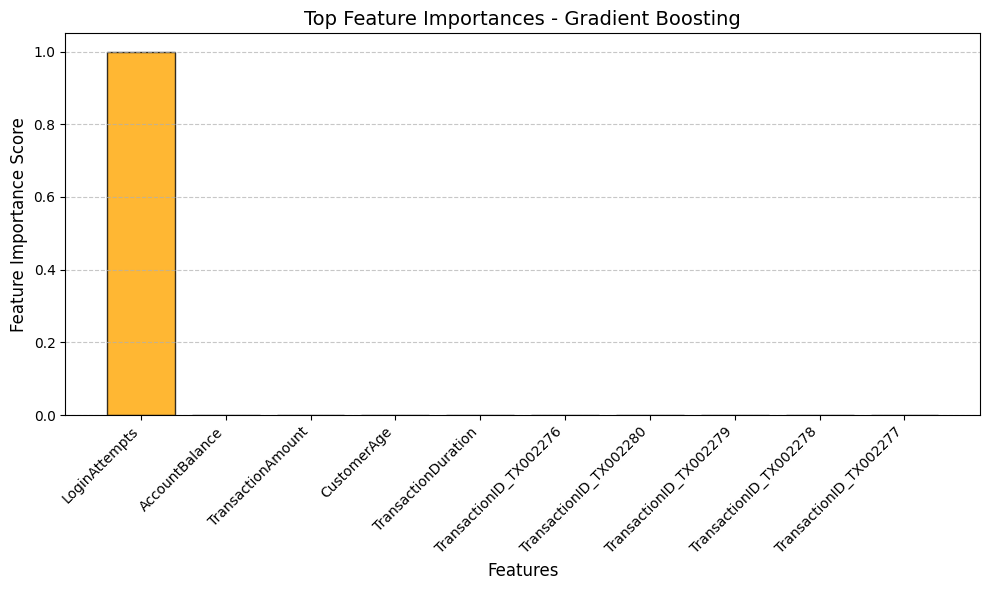

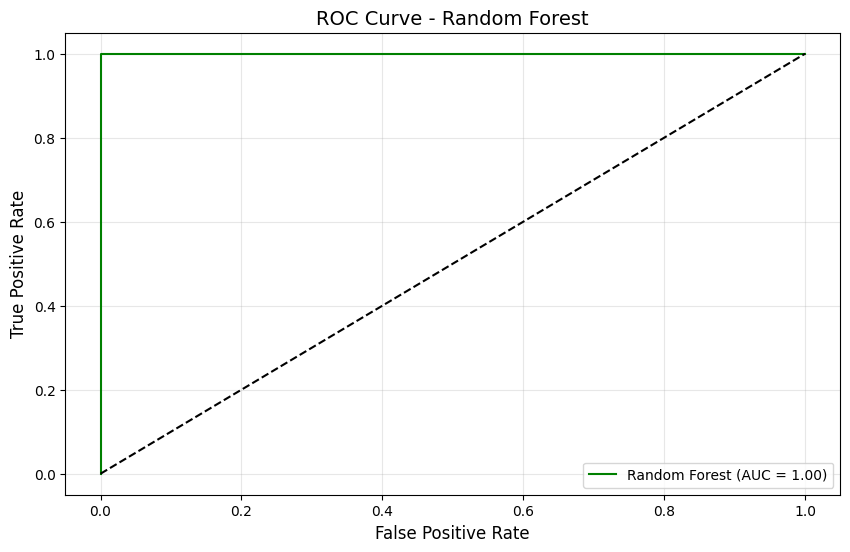

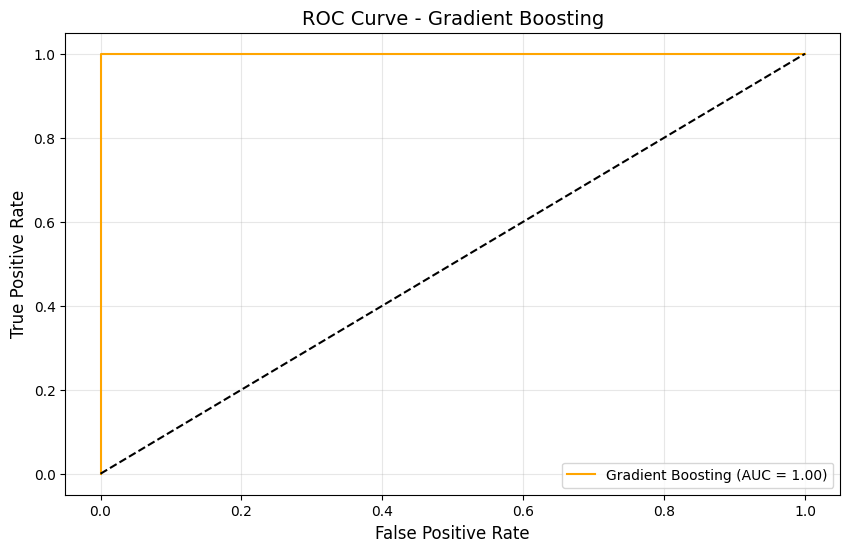

In [ ]:
# Random Forest & Gradient Boosting:

# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split

# Assuming `X` (features) and `y` (target) are pre-defined dataframes
# Example dataset split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# Gradient Boosting Model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))

# Random Forest: Feature Importance Visualization
importances_rf = rf.feature_importances_
features_rf = X.columns
sorted_indices_rf = np.argsort(importances_rf)[::-1]  # Sort in descending order

# Filter top N important features (e.g., top 10)
top_n_rf = 10
top_features_rf = sorted_indices_rf[:top_n_rf]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features_rf)), importances_rf[top_features_rf],
        color='green', edgecolor='black', alpha=0.8)
plt.xticks(range(len(top_features_rf)), [features_rf[i] for i in top_features_rf],
           rotation=45, ha='right')
plt.ylabel('Feature Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.title('Top Feature Importances - Random Forest', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gradient Boosting: Feature Importance Visualization
importances_gb = gb.feature_importances_
features_gb = X.columns
sorted_indices_gb = np.argsort(importances_gb)[::-1]  # Sort in descending order

# Filter top N important features (e.g., top 10)
top_n_gb = 10
top_features_gb = sorted_indices_gb[:top_n_gb]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_features_gb)), importances_gb[top_features_gb],
        color='orange', edgecolor='black', alpha=0.8)
plt.xticks(range(len(top_features_gb)), [features_gb[i] for i in top_features_gb],
           rotation=45, ha='right')
plt.ylabel('Feature Importance Score', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.title('Top Feature Importances - Gradient Boosting', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Random Forest: ROC Curve
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Random Forest', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Gradient Boosting: ROC Curve
gb_probs = gb.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gb_probs)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})', color='orange')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Gradient Boosting', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Step 10: Support Vector Machine

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       740
           1       0.00      0.00      0.00        14

    accuracy                           0.98       754
   macro avg       0.49      0.50      0.50       754
weighted avg       0.96      0.98      0.97       754



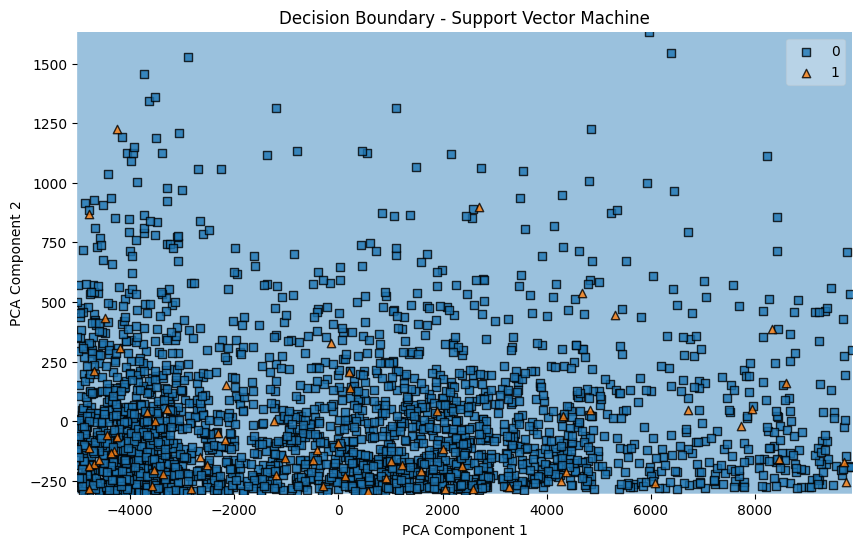

In [ ]:
# Support Vector Machine:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print(classification_report(y_test, svc_pred))

#  Support Vector Machine
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train SVM on PCA-reduced data. Here, we can also use other kernels like 'rbf' but I'm using 'linear' SVM kernel
svc = SVC(kernel='linear')
svc.fit(X_pca, y)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plot_decision_regions(X_pca, y.to_numpy(), clf=svc)
plt.title('Decision Boundary - Support Vector Machine')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Step 11: Ensemble Learning

In [ ]:
# Ensemble Learning:
ensemble = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('rf', rf),
        ('gb', gb)],
    voting='soft')
ensemble.fit(X_train, y_train)
ensemble_pred = ensemble.predict(X_test)
print(classification_report(y_test, ensemble_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       1.00      0.86      0.92        14

    accuracy                           1.00       754
   macro avg       1.00      0.93      0.96       754
weighted avg       1.00      1.00      1.00       754



# Step 12: Clustering

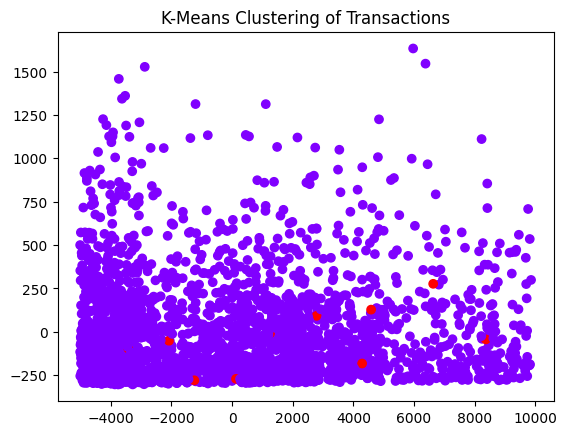

In [ ]:
# Clustering:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow')
plt.title('K-Means Clustering of Transactions')
plt.show()

# Step 13: Visualize the Data

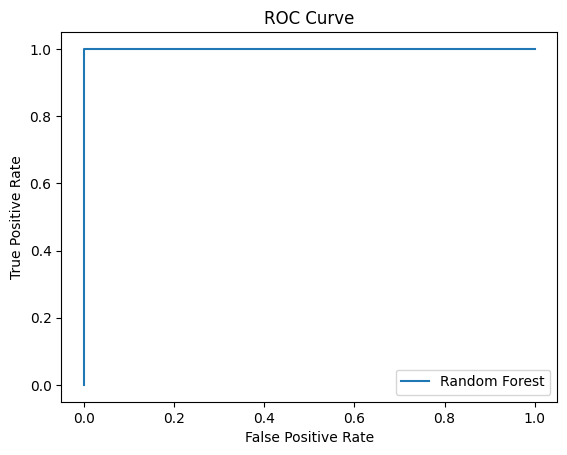

In [ ]:
# ResultSet with ROC Curve Example
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Random Forest')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()